# Content

- Introduction
- Advantages and disadvantages of nonparametric methods
- Nonparametric tests
    - Sign test
    - Wilcoxon rank sum test
    - Wilcoxon signed-rank test
    - Kruskal-Wallis test
    - Runs test
- Spearman rank correlation coefficient

In [1]:
# Imports
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import math
import pylab
import seaborn as sns
import os

# Constants
INPUT_DIR = r'Input Data'

In [5]:
# Generic functions

def preferred_rounding(v, decimals=2):
    return str(round(v, decimals))

# Introduction

## Nonparametric statistics
Parametrics tests (e.g. z test, t test, F test) involve assumptions about the sample population (i.e. normal distribution).

**But what if the sample population is NOT normally distributed?**

In this case we can use nonparametric (distribution-free) tests.

Example of tests are:
- Sign test
- Wilcoxon rank sum test
- Wilcoxon signed-rank test
- Kruskal-Wallis test
- Runs test

## Application

Determine relationship between ranking of 2 judges and jump ability of 10 freestyle skiers.

Determine if the variation of Ketchup amount in 40 ouces bottles is by chance or due to a malfunction.

## Assumptions

1. Data randomly obtained.
2. If multiple samples, than must be independent.

## Ranking
Nonparametric tests mostly involve ranking of data (i.e. ordinal variables).

If multiple values have the same rank, then we take average to get the same total.


## Advantages and disadvantages of nonparametric methods

Even though nonparametric tests can be used in place of parametric counter parts, we cannot assume they are always a better alternative.

### Advantages
1. Can be used when sample population is not normally distributed.
2. Can be used when data is nominal (gender, eye color, etc.) or ordinal (everything placed into some kind of order or scale).
3. Can be used to test hypotheses that do not involve population parameters.

### Disadvantages
1. **Less sensitive** than parametric tests. Therefore larger differences needed before hypothesis can be rejected.
2. **Use less information** than parametric tests. E.g. the sign test requires to check only if values are above or below the median, not by how much.
3. **Less efficient** than parametric tests. Therefore larger sample sizes are needed to overcome the loss of information.

# Tests

## Sign test

### Single-sample sign test

#### Definition

Simplest nonparametric test that involves comparing the sample values with the conjectured median and count the signs.
Conjecture means conclusion formed on the basis of incomplete information.

We use this test instead of the t test if sample size <= 25. If the sample size > 25, then use z test as it does not require a normal distribution with large samples.

H0 is true if the number of + ≈ -.

#### Implementation

In [43]:
def compute_single_sample_sign_test(
    sample_list,
    median=0,
    tail='two-tailed',
    alpha=0.05,
):
    
    if tail == 'two-tailed':
        operator = '≠'
        operator_label = 'different from'
    elif tail == 'right-tailed':
        operator = '>'
        operator_label = 'more than'
    elif tail == 'left-tailed':
        operator = '<'
        operator_label = 'less than'
       
    print('H0: median = {}'.format(str(median)))
    print('H1: median {} {} (claim)'.format(operator, str(median)))
    
    m, pvalue = sign_test(sample_list, mu0=median)
    print('p-value =', preferred_rounding(pvalue, decimals=4))
    
    if pvalue <= alpha:
        print('Reject H0, median is {} {}.'.format(operator_label, str(median)))
    else:
        print('Do not reject H0, median is NOT {} {}.'.format(operator_label, str(median)))

In [46]:
# Snow cone sales
# Want to find out if median number of sells per day is 40.
# Alpha 0.05.
# p-value = 0.0075 as confirmed in the text book. And we can reject H0.

snow_cone_sales_list = [
    18, 43, 40, 16, 22,
    30, 29, 32, 37, 36,
    39, 34, 39, 45, 28,
    36, 40, 34, 39, 52,
]
compute_single_sample_sign_test(
    snow_cone_sales_list,
    median=40,
    alpha=0.05,
)

H0: median = 40
H1: median ≠ 40 (claim)
p-value = 0.0075
Reject H0, median is different from 40.


H0: median = 11
H1: median ≠ 11 (claim)
p-value = 0.0
Reject H0, median is different from 11.


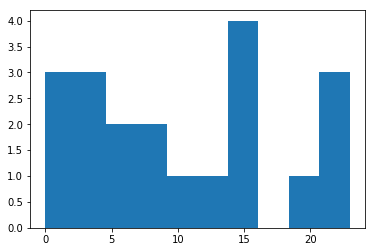

In [42]:
# Clean air
# Check if median number of days city below EPA standards is 11 days.
# Alpha 0.05.

below_epa_list = [
    15, 14, 1, 9, 0, 3, 3, 1, 10, 8,
    6, 16, 21, 22, 3, 19, 16, 5, 23, 13,
]
compute_single_sample_sign_test(
    snow_cone_sales_list,
    median=11,
    tail='two-tailed',
    alpha=0.05,
)

plt.hist(below_epa_list)
plt.show()

### Paired-sample sign test

#### Definition

Test sample means in the comparison of two dependent samples.

Mainly for **before and after tests**, however it is less powerful than the Wilcoxon signed-rank test.


#### Implementation

Check Wilcoxon signed-rank test instead.

## Wilcoxon tests

### Definition
Problem with the sign test is that it does not consider magniture of data.

Wilcoxon tests solve issue by using ranks:
- **Wilcoxon rank sum test**: independent samples (corresponding to parametric z and t tests)
- **Wilcoxon signed-rank test**: dependent samples (corresponding to parametric t test)

### Goal
Compare distributions.

### Wilcoxon rank sum test

For comparing the distribution of **independent samples**.

#### Approach
1. Combine data from 2 sample sets (e.g. time to complete training for marines and army).
2. Sum ranking of group with smallest sample size.
3. Substitute in formula and put result (z) against C.V.

#### Formula

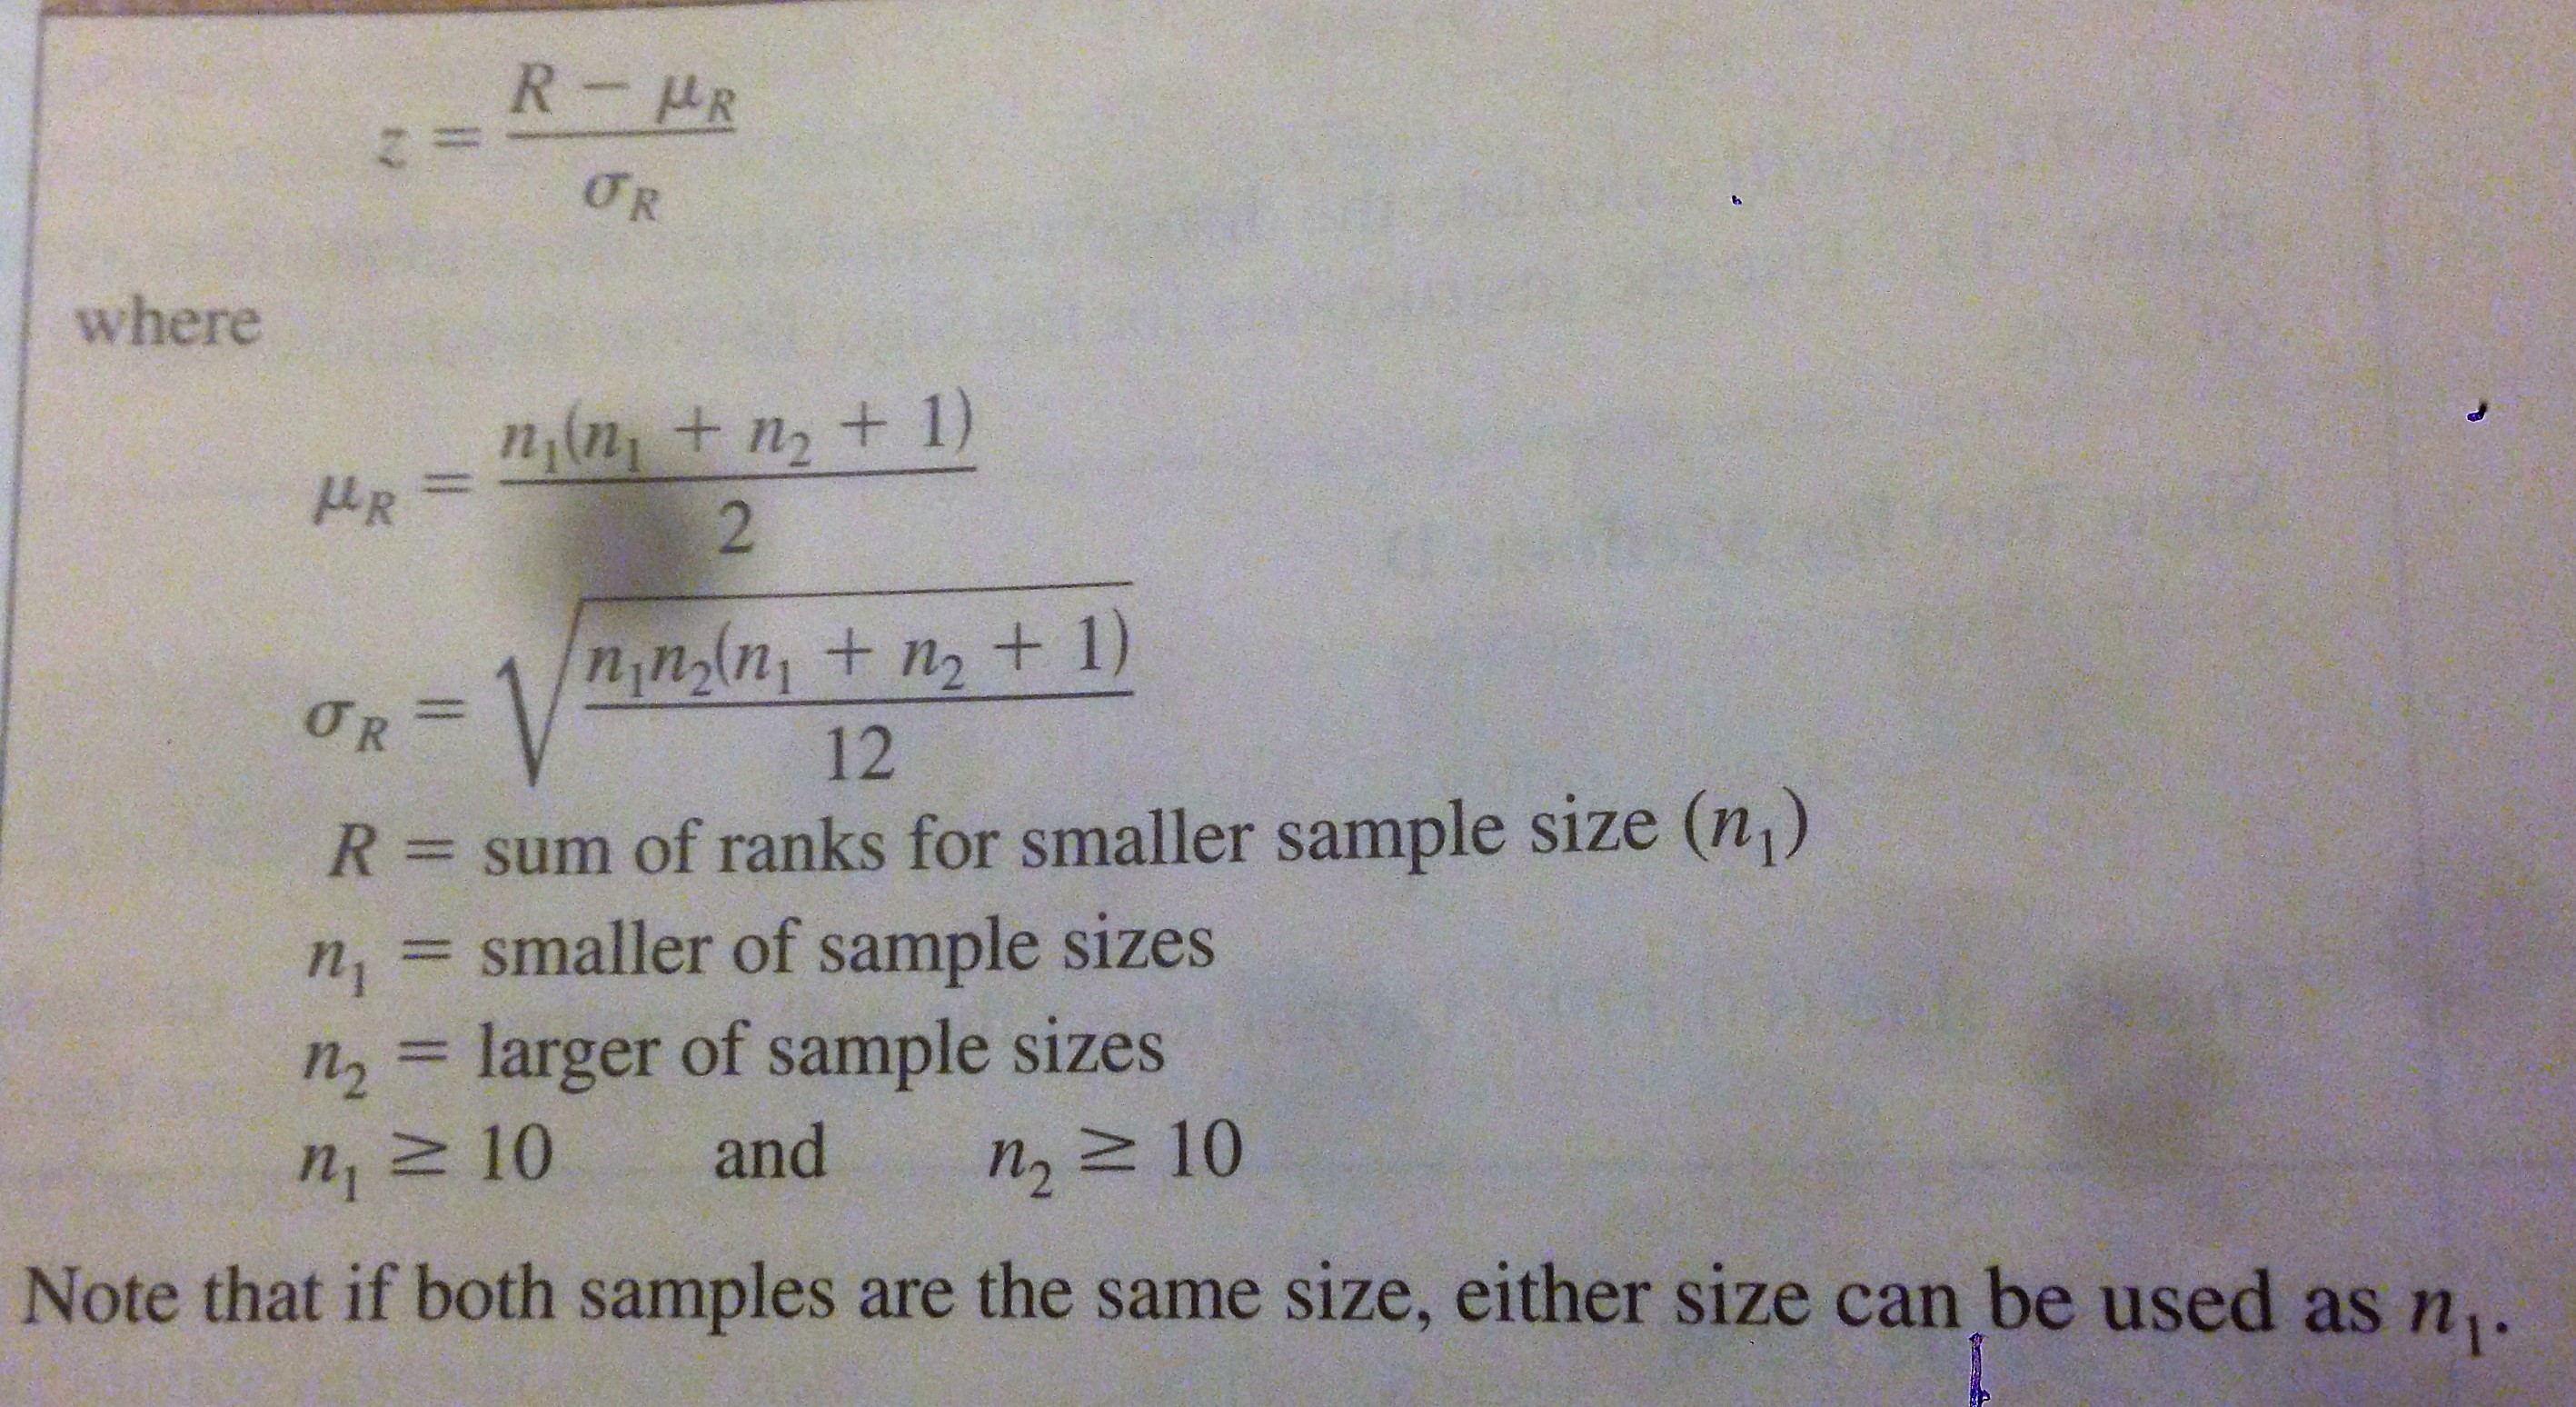

#### Implementation

In [28]:
def compute_wilcoxon_rank_sum_test(
    array_sample1,
    array_sample2,
    tail='two-tailed',
    alpha=0.05,
):
    r"""
    The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.
    In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 
    It is a non-parametric version of the paired T-test.
    """
    
    # Get the test statistic and the two-sided p-value of the test
    stat, pvalue = stats.ranksums(array_sample1, array_sample2)
    print('p-value =', preferred_rounding(pvalue, decimals=3))
    print('test value =', preferred_rounding(stat, decimals=3))
    
    reject_h0 = False
    if tail == 'two-tailed':
        operator = '≠'
        operator_label = 'different from'
        if pvalue <= alpha:
            reject_h0 = True
    elif tail == 'right-tailed':
        operator = '>'
        operator_label = 'more than'
        if pvalue/2 < alpha and stat > 0:
            reject_h0 = True
    elif tail == 'left-tailed':
        operator = '<'
        operator_label = 'less than'
        if pvalue/2 < alpha and stat < 0:
            reject_h0 = True
       
    print('H0: before = after')
    print('H1: before {} after (claim)'.format(operator))
  
    if reject_h0:
        print('Reject H0, sample 1 is {} sample 2.'.format(operator_label))
    else:
        print('Do not reject H0, sample 1 is NOT {} sample 2.'.format(operator_label))
        print('We do not have enough evidence to support the claim.')

#### Examples

In [29]:
# Obstacles
army_array = [15, 18, 16, 17, 13, 22, 24, 17, 19, 21, 26, 28]
marines_array = [14, 9, 16, 19, 10, 12, 11, 8, 15, 18, 25]

compute_wilcoxon_rank_sum_test(
    army_array,
    marines_array,
    tail='two-tailed',
    alpha=0.05,
)

p-value = 0.016
test value = 2.4
H0: before = after
H1: before ≠ after (claim)
Reject H0, sample 1 is different from sample 2.


In [29]:
# School lunch
elementary = [648, 589, 625, 595, 789, 727, 702, 564]
secondary = [694, 730, 750, 810, 860, 702, 657, 761]

compute_wilcoxon_rank_sum_test(
    elementary,
    secondary,
    tail='two-tailed',
    alpha=0.05,
)

p-value = 0.031
test value = -2.153
H0: before = after
H1: before ≠ after (claim)
Reject H0, sample 1 is different from sample 2.


### Wilcoxon rank sum test

For comparing the distribution of **dependent samples**.

In [3]:
def compute_wilcoxon_signed_rank_test(
    array_sample1, # before
    array_sample2, # after
    tail='two-tailed',
    alpha=0.05,
):
    r"""
    The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.
    In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 
    It is a non-parametric version of the paired T-test.
    """
    
    stat, pvalue = stats.wilcoxon(array_sample1, array_sample2, zero_method='wilcox', correction=False)
    print('p-value =', preferred_rounding(pvalue, decimals=3))
    print('test value =', preferred_rounding(stat, decimals=3))
    
    reject_h0 = False
    if tail == 'two-tailed':
        operator = '≠'
        operator_label = 'different from'
        if pvalue <= alpha:
            reject_h0 = True
    elif tail == 'right-tailed':
        operator = '>'
        operator_label = 'more than'
        if pvalue/2 < alpha and stat > 0:
            reject_h0 = True
    elif tail == 'left-tailed':
        operator = '<'
        operator_label = 'less than'
        if pvalue/2 < alpha and stat < 0:
            reject_h0 = True
       
    print('H0: before = after')
    print('H1: before {} after (claim)'.format(operator))
  
    if reject_h0:
        print('Reject H0, sample 1 is {} sample 2.'.format(operator_label))
    else:
        print('Do not reject H0, sample 1 is NOT {} sample 2.'.format(operator_label))
        print('We do not have enough evidence to support the claim.')

In [6]:
# Ear infection swimmers (sign test exercise)
df_ear_infections = pd.DataFrame({
    'swimmer': list('ABCDEFGHIJ'),
    'before': [3, 0, 5, 4, 2, 4, 3, 5, 2, 1],
    'after': [2, 1, 4, 0, 1, 3, 1, 3, 2, 3],
})

compute_wilcoxon_signed_rank_test(
    df_ear_infections['before'],
    df_ear_infections['after'],
    tail='right-tailed',
    alpha=0.05,
)

p-value = 0.13
test value = 10.0
H0: before = after
H1: before > after (claim)
Do not reject H0, sample 1 is NOT more than sample 2.
We do not have enough evidence to support the claim.


c:\users\gampe\documents\ve\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [14]:
# Shoplifting incidents (dependent samples)
df_shoplifting_incidents = pd.DataFrame({
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'before': [7, 2, 3, 6, 5, 8, 12],
    'after': [5, 3, 4, 3, 1, 6, 4],
})

compute_wilcoxon_signed_rank_test(
    df_shoplifting_incidents['before'],
    df_shoplifting_incidents['after'],
    tail='two-tailed',
    alpha=0.05,
)

p-value = 0.062
test value = 3.0
H0: before = after
H1: before ≠ after (claim)
Do not reject H0, sample 1 is NOT different from sample 2.
We do not have enough evidence to support the claim.


c:\users\gampe\documents\ve\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [21]:
# Pain medication (dependent samples)
df_pain_medication = pd.DataFrame({
    'day': range(1, 9),
    'before': [8, 6, 2, 3, 4, 6, 2, 7],
    'after': [6, 5, 3, 1, 2, 6, 1, 6],
})

compute_wilcoxon_signed_rank_test(
    df_pain_medication['before'],
    df_pain_medication['after'],
    tail='right-tailed',
    alpha=0.05,
)

p-value = 0.046
test value = 2.5
H0: before = after
H1: before > after (claim)
Reject H0, sample 1 is more than sample 2.


c:\users\gampe\documents\ve\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


## Kruskal-Wallis test

### Definition
Counter-part of ANOVA for **comparing means of 3 or more populations**.

Use if populations are not normally distributed or the variances are not equal.

ANOVA uses F-test, Kruskal-Wallis test is also called **H-test**.

### Assumptions

Each sample size >= 5.

### Formula

We always do a right-tailed test based on the chi-square distribution table.

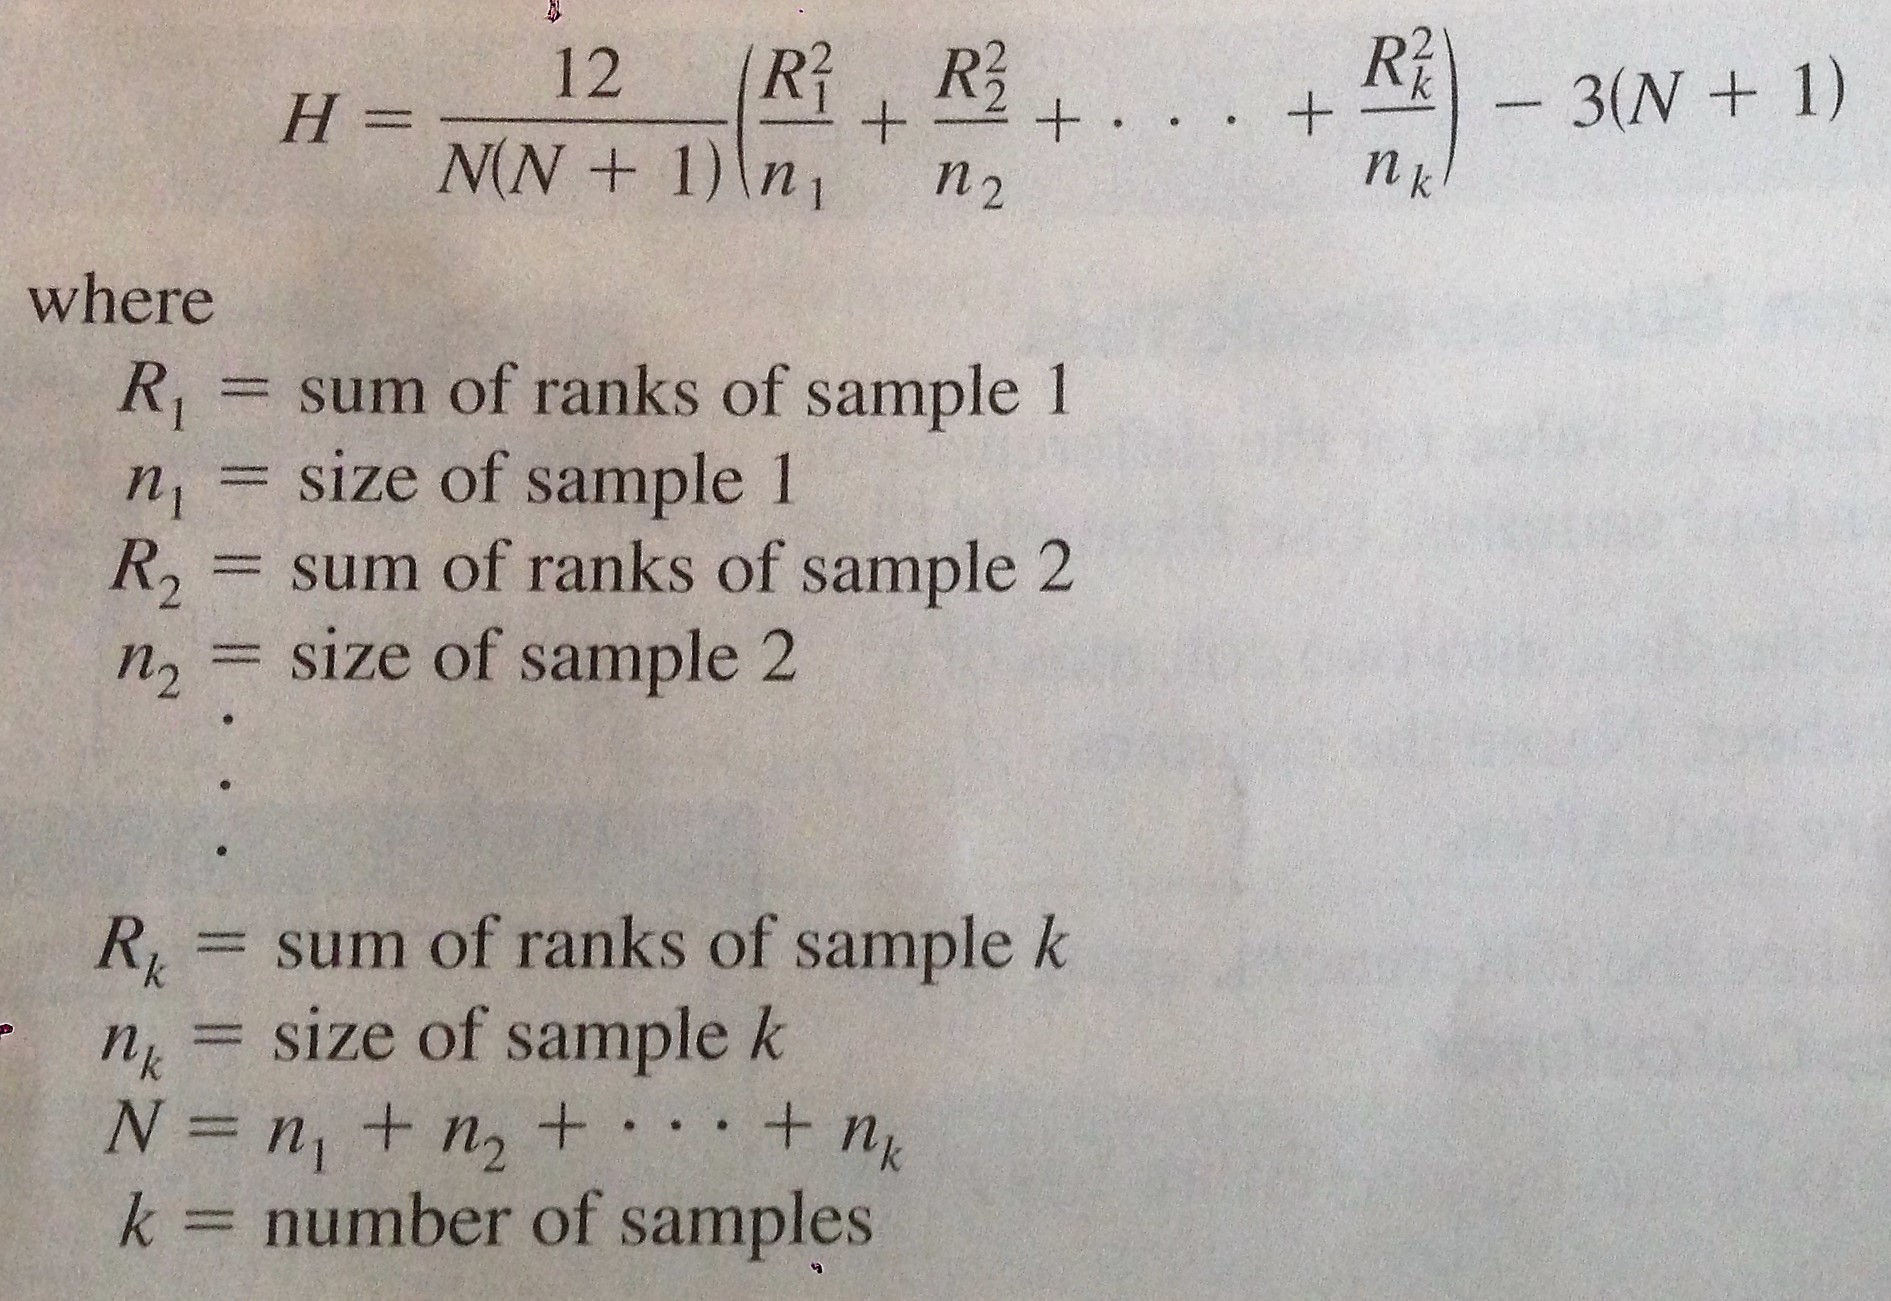

### Implementation

In [39]:
def compute_kruskal_wallis_test(
    sample_list, # list of multiple samples for which to compare the mean.
    alpha=0.05,
):
    r"""
    The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. 
    It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. 
    Post-hoc comparisons between groups are required to determine which groups are different.
    """
    
    stat, pvalue = stats.kruskal(*sample_list)
    print('p-value =', preferred_rounding(pvalue, decimals=3))
    print('test value (H value) =', preferred_rounding(stat, decimals=3))
       
    print('H0: there is no difference in the means of the groups.')
    print('H1: there is a significant difference in the means of the groups.')
  
    if pvalue <= alpha:
        print('Conclusion: reject H0.')
    else:
        print('Conclusion: do not reject H0.')
        print('We do not have enough evidence to reject H0.')

### Exercises

In [40]:
# Hospital infections
group_a = [557, 315, 920, 178]
group_b = [476, 232, 80, 116]
group_c = [105, 110, 167, 155]

compute_kruskal_wallis_test(
    [group_a, group_b, group_c], # list of multiple samples for which to compare the mean.
    alpha=0.05,
)

p-value = 0.069
test value (H value) = 5.346
H0: there is no difference in the means of the groups.
H1: there is a significant difference in the means of the groups.
Conclusion: do not reject H0.
We do not have enough evidence to reject H0.


In [55]:
# Height of waterfalls
north_america = [600, 1200, 182, 620, 1170, 442]
africa = [406, 508, 630, 726, 480, 2014]
asia = [330, 830, 614, 1100, 885, 330]

compute_kruskal_wallis_test(
    [north_america, africa, asia], # list of multiple samples for which to compare the mean.
    alpha=0.05,
)

p-value = 0.994
test value (H value) = 0.012
H0: there is no difference in the means of the groups.
H1: there is a significant difference in the means of the groups.
Conclusion: do not reject H0.
We do not have enough evidence to reject H0.


In [42]:
# Potassium in breakfast drinks
brand_a = [4.7, 3.2, 5.1, 5.2, 5.0]
brand_b = [5.3, 6.4, 7.3, 6.8, 7.2]
brand_c = [6.3, 8.2, 6.2, 7.1, 6.6]

compute_kruskal_wallis_test(
    [brand_a, brand_b, brand_c], # list of multiple samples for which to compare the mean.
    alpha=0.05,
)

p-value = 0.009
test value (H value) = 9.38
H0: there is no difference in the means of the groups.
H1: there is a significant difference in the means of the groups.
Conclusion: reject H0.


## Spearman rank correlation coefficient

### Definition
Counter-part of Pearson product moment correlation coefficient, which requires samples to be taken from populations that are normally distributed.

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

**Goal is to identify the relationship between variables**.

Computation involves ranking each dataset rS computed by using the difference between ranks:
- Both datasets have same ranks: rS = +1 (strong positive correlation)
- Both datasets have opposite ranks: rS = -1 (strong negative correlation)
- No relationship: rS = 0

### Details

This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

The **p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets**.

### Formula

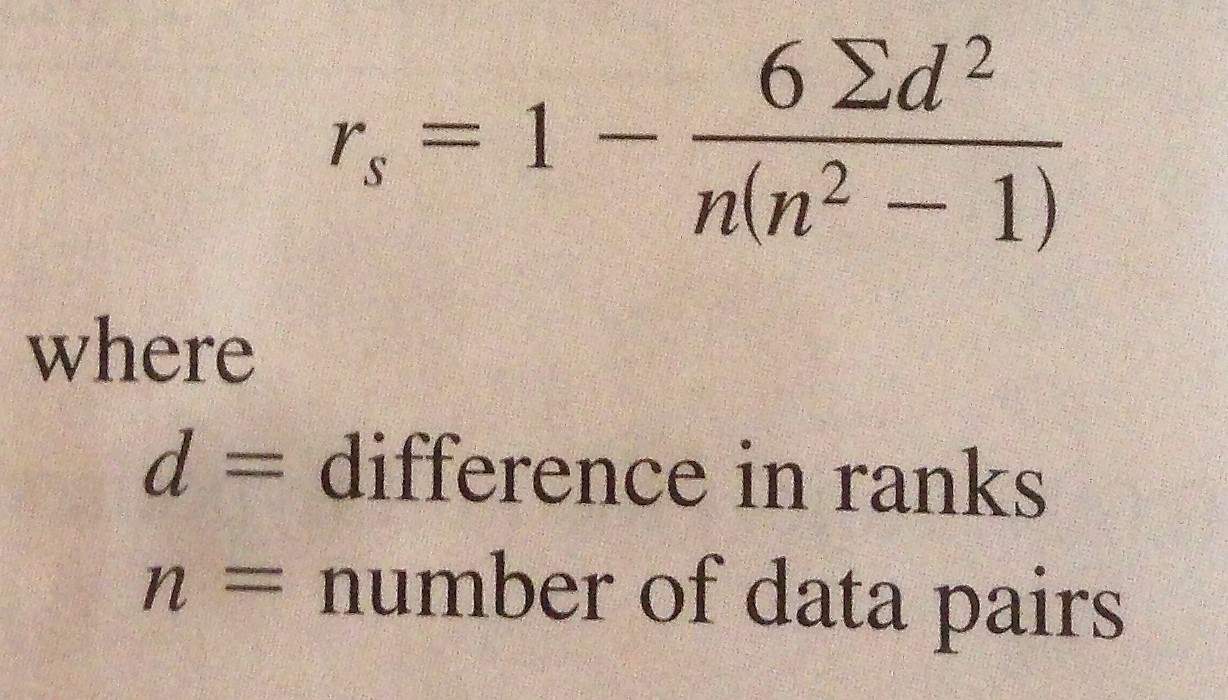

### Implementation

In [60]:
def compute_spearman_rank_correlation_coefficient(
    array_sample1,
    array_sample2,
    alpha=0.05,
):
    r"""
    The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. 
    Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 
    Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 
    Correlations of -1 or +1 imply an exact monotonic relationship. 
    Positive correlations imply that as x increases, so does y. 
    Negative correlations imply that as x increases, y decreases.
    """
    
    coef, pvalue = stats.spearmanr(array_sample1, array_sample2)
    print('p-value =', preferred_rounding(pvalue, decimals=3))
    print('Spearman Coefficient (rS) =', preferred_rounding(coef, decimals=3))
       
    print('H0: ρ = 0 (no correlation)')
    print('H1: ρ ≠ 0 (significant correlation)')
  
    if pvalue <= alpha:
        print('Samples are correlated (reject H0).')
    else:
        print('Samples are uncorrelated (fail to reject H0)')

### Exercises

In [61]:
# Bank branches and deposits
df_bank_deposits = pd.DataFrame({
    'bank': list('ABCDEFGH'),
    'branch_count': [209, 353, 19, 201, 344, 132, 401, 126],
    'deposit_sum': [23, 31, 7, 12, 26, 5, 24, 5],
})

compute_spearman_rank_correlation_coefficient(
    df_bank_deposits['branch_count'],
    df_bank_deposits['deposit_sum'],
    alpha=0.05,
)

p-value = 0.007
Spearman Coefficient (rS) = 0.85
H0: ρ = 0 (no correlation)
H1: ρ ≠ 0 (significant correlation)
Samples are correlated (reject H0).


## Runs test

### Goal

Find out if samples are selected at random.

### Definition

The **run** is a succession of identical letters preceded or followed by a different letter or no letter at all, such as the beginning or end of the succession.

Idea is to compare number of runs rather than frequency of letters.

### Implementation

Could not find base for calculating critical values of number of runs.

Runs test seems not commonly used.